 #  第2章 K-近邻算法

## 2.1 使用K-近邻算法将电影进行分类

k-邻近算法的一般流程

1. 收集数据：可以使用任何方法。
2. 准备数据：距离计算所需要的数值，最好是结构化的数据格式。
3. 分析数据：可以使用任何方法。
4. 测试算法：计算错误率。
5. 使用算法：首先需要输入样本数据和结构化的输出结果，然后运行k-近邻算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理。

准备：导入数据

In [27]:
from numpy import *
import numpy as np
import operator
from os import listdir

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [17]:
group,labels=createDataSet()

In [18]:
group

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [19]:
labels

['A', 'A', 'B', 'B']

对未知类别属性的数据集中的每个点依次执行以下操作

1. 计算已知类别数据集中的点与当前点之间的距离；
2. 按照距离递增次序排序；
3. 选取与当前点距离最小的k个点；
4. 确定前k个点所在类别的出现频率；
5. 返回前k个点出现频率最高的类别作为当前点的预测分类。

程序2-1 k-近邻算法

In [46]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

inX：用于分类的输入向量；dataSet：输入的训练样本集；labels：标签向量，它的元素数目和矩阵dataSet的行数相同；k：最近邻居的数目。
Python 2 中是classCount.iteritems()；Python 3 中是classCount.items()

In [21]:
classify0([0,0],group,labels,3)

'B'

## 2.2 使用k-近邻算法改进约会网站的配对效果

算法流程：

1. 收集数据：提供文本文件；
2. 准备数据：使用Python解析文本文件；
3. 分析数据：使用Matplotlib画二维扩散图；
4. 测试算法：使用海伦提供的部分数据作为测试样本；
5. 使用算法：产生简单的命令行程序，然后海伦可以输入一些特征数据以判断对方是否为自己喜欢的类型。

数据存放在文件datingTestSet2.txt中，共1000行，主要包含以下3种特征

- 每年获得的飞行常客里程数
- 玩视频游戏所耗时间百分比
- 每周消费的冰淇淋公升数

In [28]:
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = np.zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        #listFromLine = line.split()
        returnMat[index,:] = listFromLine[0:3]
        #classLabelVector.append(float(listFromLine[-1]))
        classLabelVector.append(float(listFromLine[-1].replace(',','')))
        index=index+1
    return returnMat,classLabelVector

In [29]:
datingDataMat,datingLabels=file2matrix('datingTestSet2.txt')

分析数据：使用matplotlib创建散点图

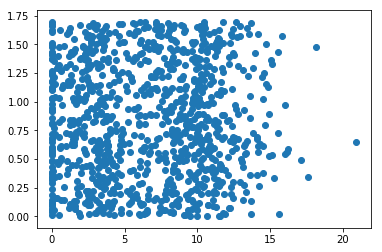

In [34]:
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
plt.show()

对上面的数据采用不同的颜色展示如下：

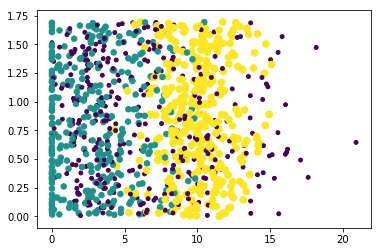

In [33]:
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

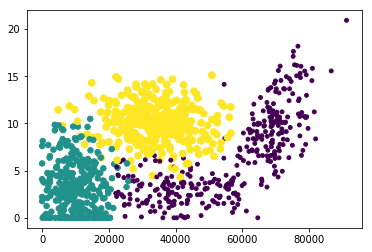

In [35]:
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

准备数据：归一化数值

In [36]:
#newValue=(oldValue-min)/(max-min)

In [37]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))   #element wise divide
    return normDataSet, ranges, minVals

In [38]:
normMat,ranges,minVals=autoNorm(datingDataMat)

In [39]:
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

测试算法：作为完整程序验证分类器

In [47]:
def datingClassTest():
    hoRatio = 0.50      #hold out 10%
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print (errorCount)

In [48]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

使用算法：构建完整可用系统

In [57]:
def classifyPerson():
    resultList=['not at all', 'in small doses', 'in large doses']
    percentTats=float(input("percentage of time spent playing video games?"))
    ffMiles=float(input("frequent flier miles earned per year?"))
    iceCream=float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels=file2matrix('datingTestSet2.txt')
    normMat,ranges,minvals=autoNorm(datingDataMat)
    inArr=array([ffMiles, percentTats, iceCream])
    classifierResult=int(classify0((inArr-minVals)/ranges, normMat, datingLabels, 3))
    print ("You will probably like this person: ", resultList[classifierResult-1])

In [58]:
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?1000
liters of ice cream consumed per year?0.5
You will probably like this person:  in small doses


## 2.3 手写识别系统

In [ ]:
程序流程

In [ ]:
1. 收集数据：提供文本文件。
2. 准备数据：编写函数img2vector(),将图像格式转换为分类器使用的向量格式。
3. 分析数据：在Python命令提示符中检查数据，确保它符合要求。
4. 测试算法：编写函数使用提供的部分数据集作为测试样本。

准备数据：将图像转换为测试向量

数据存储在两个子目录内：目录trainingDigits中包含了大约2000个例子，每个数字大约有200个样本；
目录testDigits中包含了大约900个测试数据。
使用目录trainingDigits中的数据训练分类器，使用目录testDigits中中的数据测试分类器的效果。

In [ ]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

处理图片：函数 img2vector把一个32X32的二进制图像矩阵转换为1X1024的Numpy数组，然后打开给定的文件，循环读出文件的前32行，并将每行的头32个字符值存储在Nmupy数组中，然后返回数组。

测试数据：使用k-近邻算法识别手写数字

In [ ]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')           #获取目录内容
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print "the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr)
        if (classifierResult != classNumStr): errorCount += 1.0
    print "\nthe total number of errors is: %d" % errorCount
    print "\nthe total error rate is: %f" % (errorCount/float(mTest))

将trainingDigits目录中的文件内容存储在列表中，
得到目录中有多少文件，并将其存储在变量m中。
创建一个m行1024列的训练矩阵，该矩阵的每行数据存储一个图像。
从文件名中解析出分类数字。
该目录下的文件按照规则命名，如9_45.txt的分类是9，它是数字9的第45个实例。
将类代码存储在hwLabels向量中，使用前面讨论的img2vector函数载入图像。
对testDigits目录中的文件执行相似的操作，不同的是并将这个目录下的文件载入矩阵中，而是用classify（）函数测试改目录下的每个文件。

In [ ]:
handwritingClassTest()